In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

print(os.listdir('/'))

# Distribution graphs (histogram/bar graph) of column data

def plot_per_column_distribution(data_frame, num_graphs_shown, num_graphs_per_row):
    num_unique = data_frame.nunique()
    data_frame = data_frame[[col for col in data_frame if num_unique[col] > 1 and num_unique[col] < 50]]
    num_rows, num_cols = data_frame.shape
    column_names = list(data_frame)
    num_graph_rows = int((num_cols + num_graphs_per_row - 1) / num_graphs_per_row)
    plt.figure(num=None, figsize=(6 * num_graphs_per_row, 8 * num_graph_rows), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(num_cols, num_graphs_shown)):
        plt.subplot(num_graph_rows, num_graphs_per_row, i + 1)
        column_df = data_frame.iloc[:, i]
        if not np.issubdtype(type(column_df.iloc[0]), np.number):
            value_counts = column_df.value_counts()
            value_counts.plot.bar()
        else:
            column_df.hist()
        plt.ylabel('Counts')
        plt.xticks(rotation=90)
        plt.title(f'{column_names[i]} (Column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

# Scatter and density plots

def plot_scatter_matrix(data_frame, plot_size, text_size):
    data_frame = data_frame.select_dtypes(include=[np.number])
    data_frame = data_frame[[col for col in data_frame if data_frame[col].nunique() > 1]]
    column_names = list(data_frame)
    if len(column_names) > 10:
        column_names = column_names[:10]
    data_frame = data_frame[column_names]
    axes = pd.plotting.scatter_matrix(data_frame, alpha=0.75, figsize=[plot_size, plot_size], diagonal='kde')
    corrs = data_frame.corr().values
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=text_size)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [2]:
# Read the first CSV file
num_rows_to_read = 1000  # specify 'None' if you want to read the whole file
df_2015 = pd.read_csv('2015.csv', delimiter=',', nrows=num_rows_to_read)
df_2015.dataframe_name = '2015.csv'
num_rows, num_cols = df_2015.shape
print(f'There are {num_rows} rows and {num_cols} columns')


There are 158 rows and 12 columns


In [3]:
# Let's take a quick look at what the data looks like:
df_2015.head(5)


Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

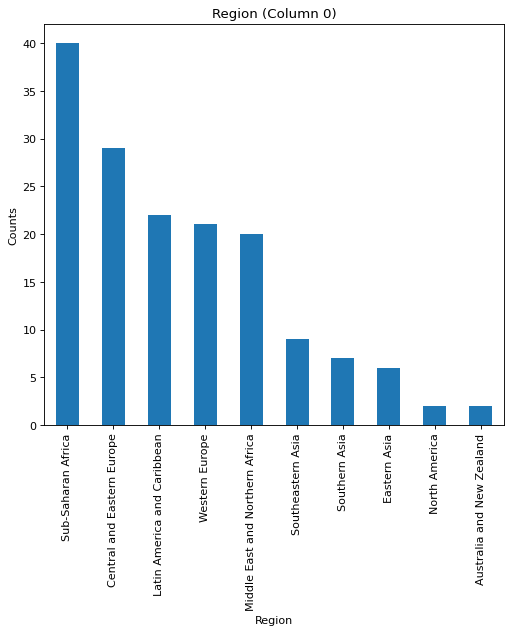

(158, 12)

In [4]:
# Distribution graphs (histogram/bar graph) of sampled columns:
plot_per_column_distribution(df_2015, 10, 5)
df_2015.shape


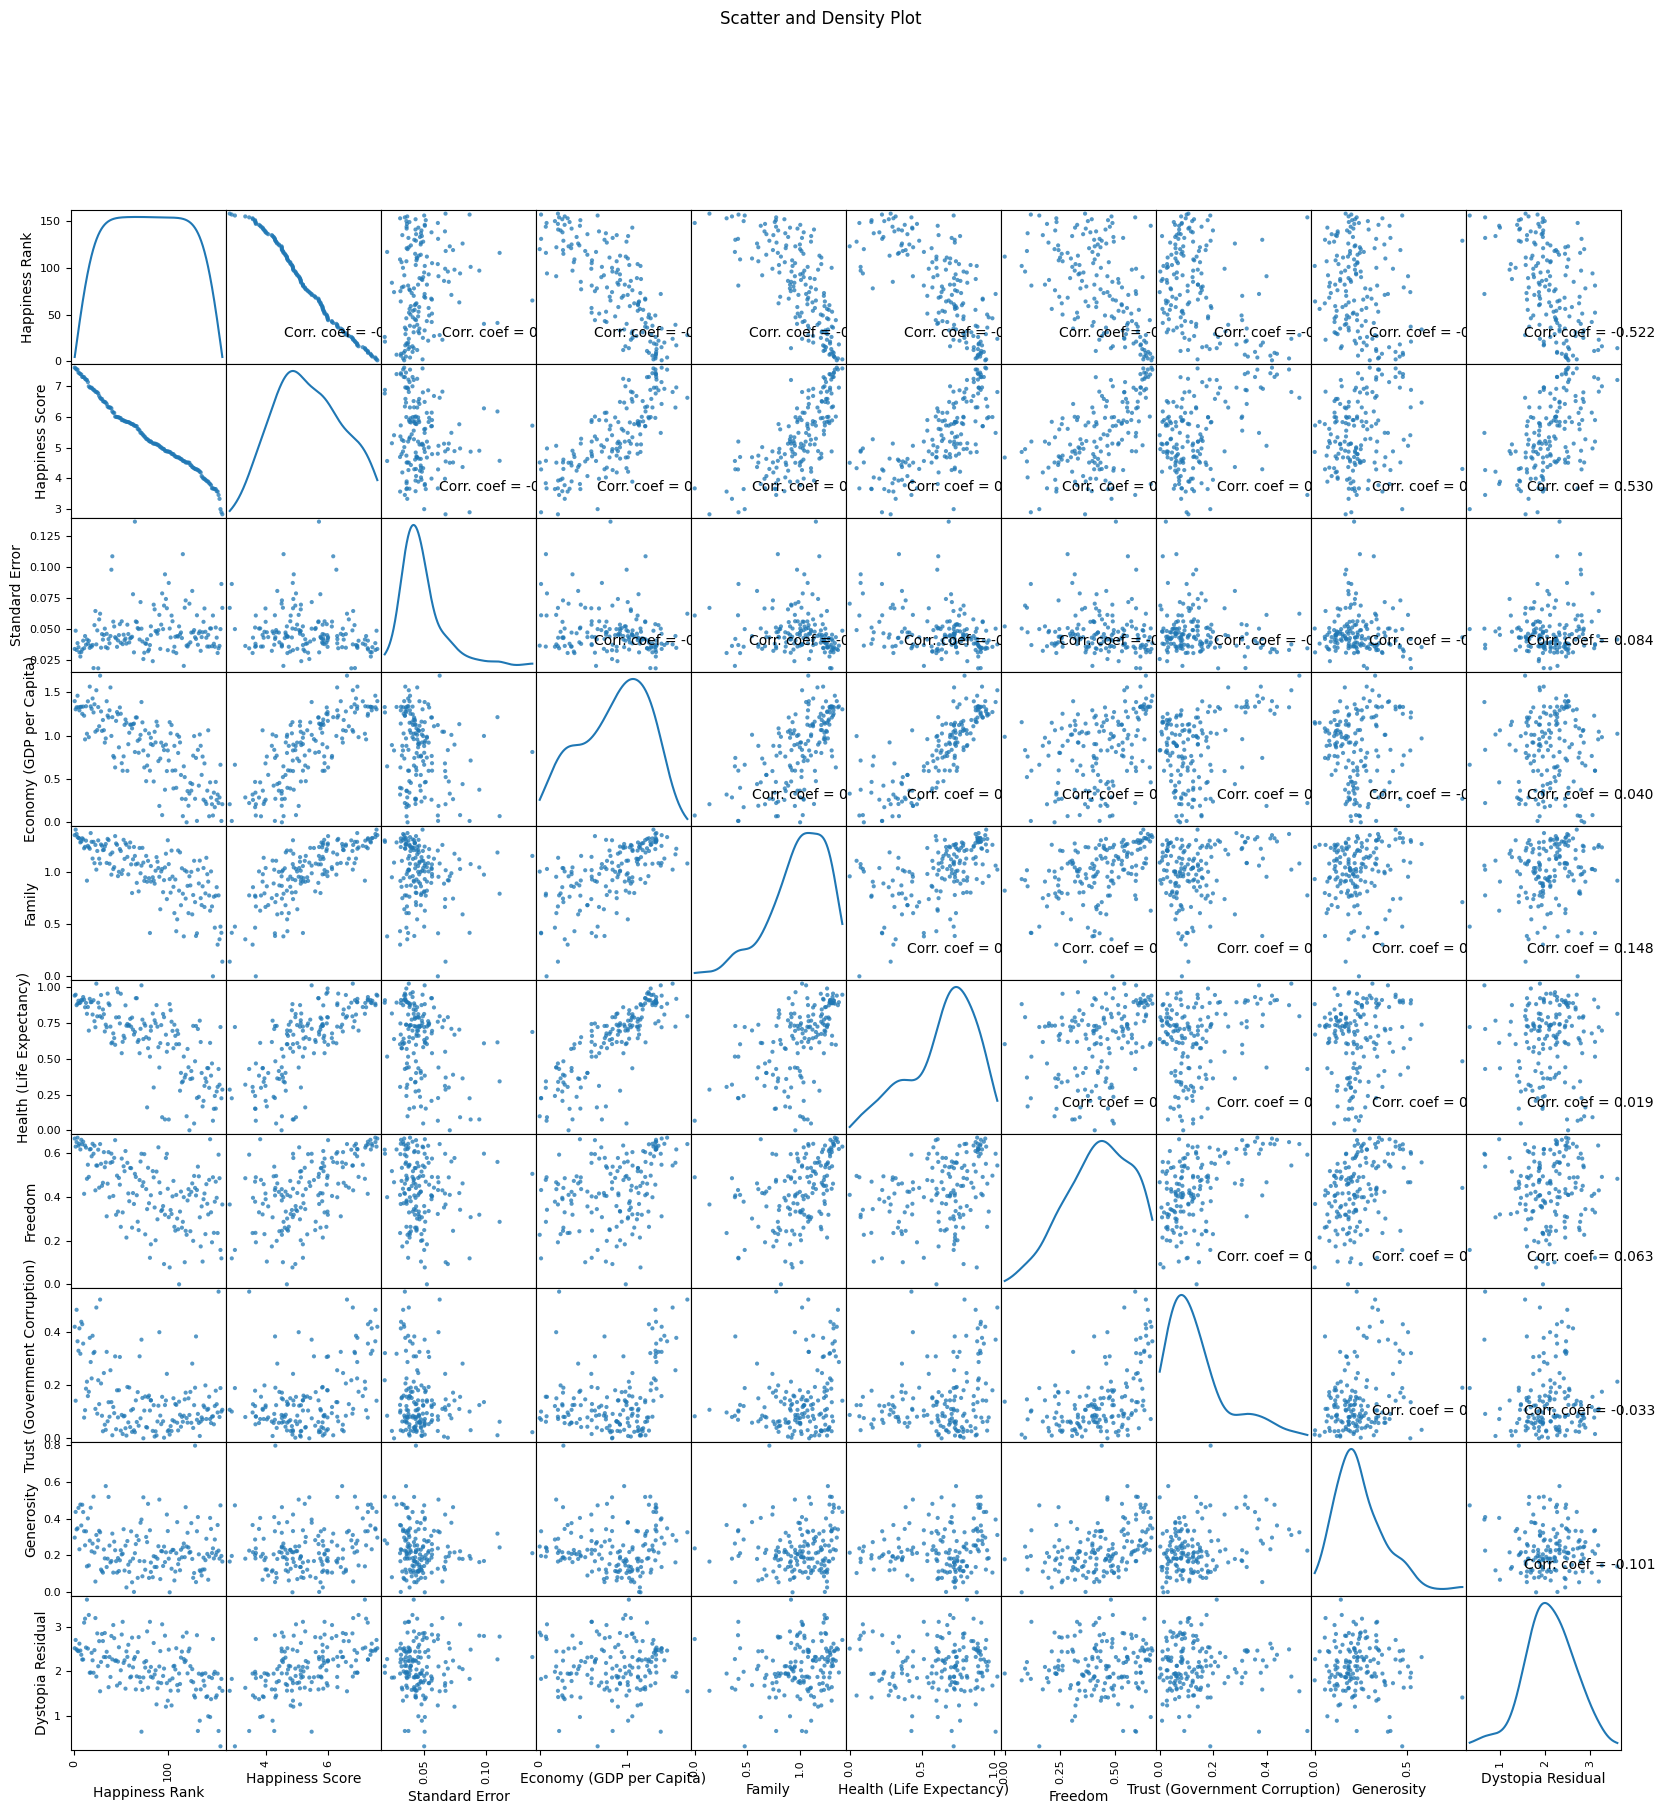

In [6]:
# Scatter and density plots:
plot_scatter_matrix(df_2015, 20, 10)


In [7]:
# Repeat the process for the second CSV file
num_rows_to_read = 1000
df_2016 = pd.read_csv('2016.csv', delimiter=',', nrows=num_rows_to_read)
df_2016.dataframe_name = '2016.csv'
num_rows, num_cols = df_2016.shape
print(f'There are {num_rows} rows and {num_cols} columns')


There are 157 rows and 13 columns


In [8]:
# Let's take a quick look at what the data looks like:
df_2016.head(5)


Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

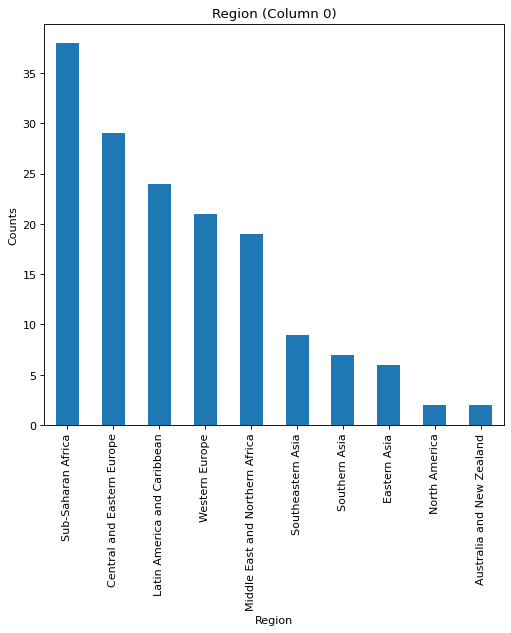

In [9]:
# Distribution graphs (histogram/bar graph) of sampled columns:
plot_per_column_distribution(df_2016, 10, 5)


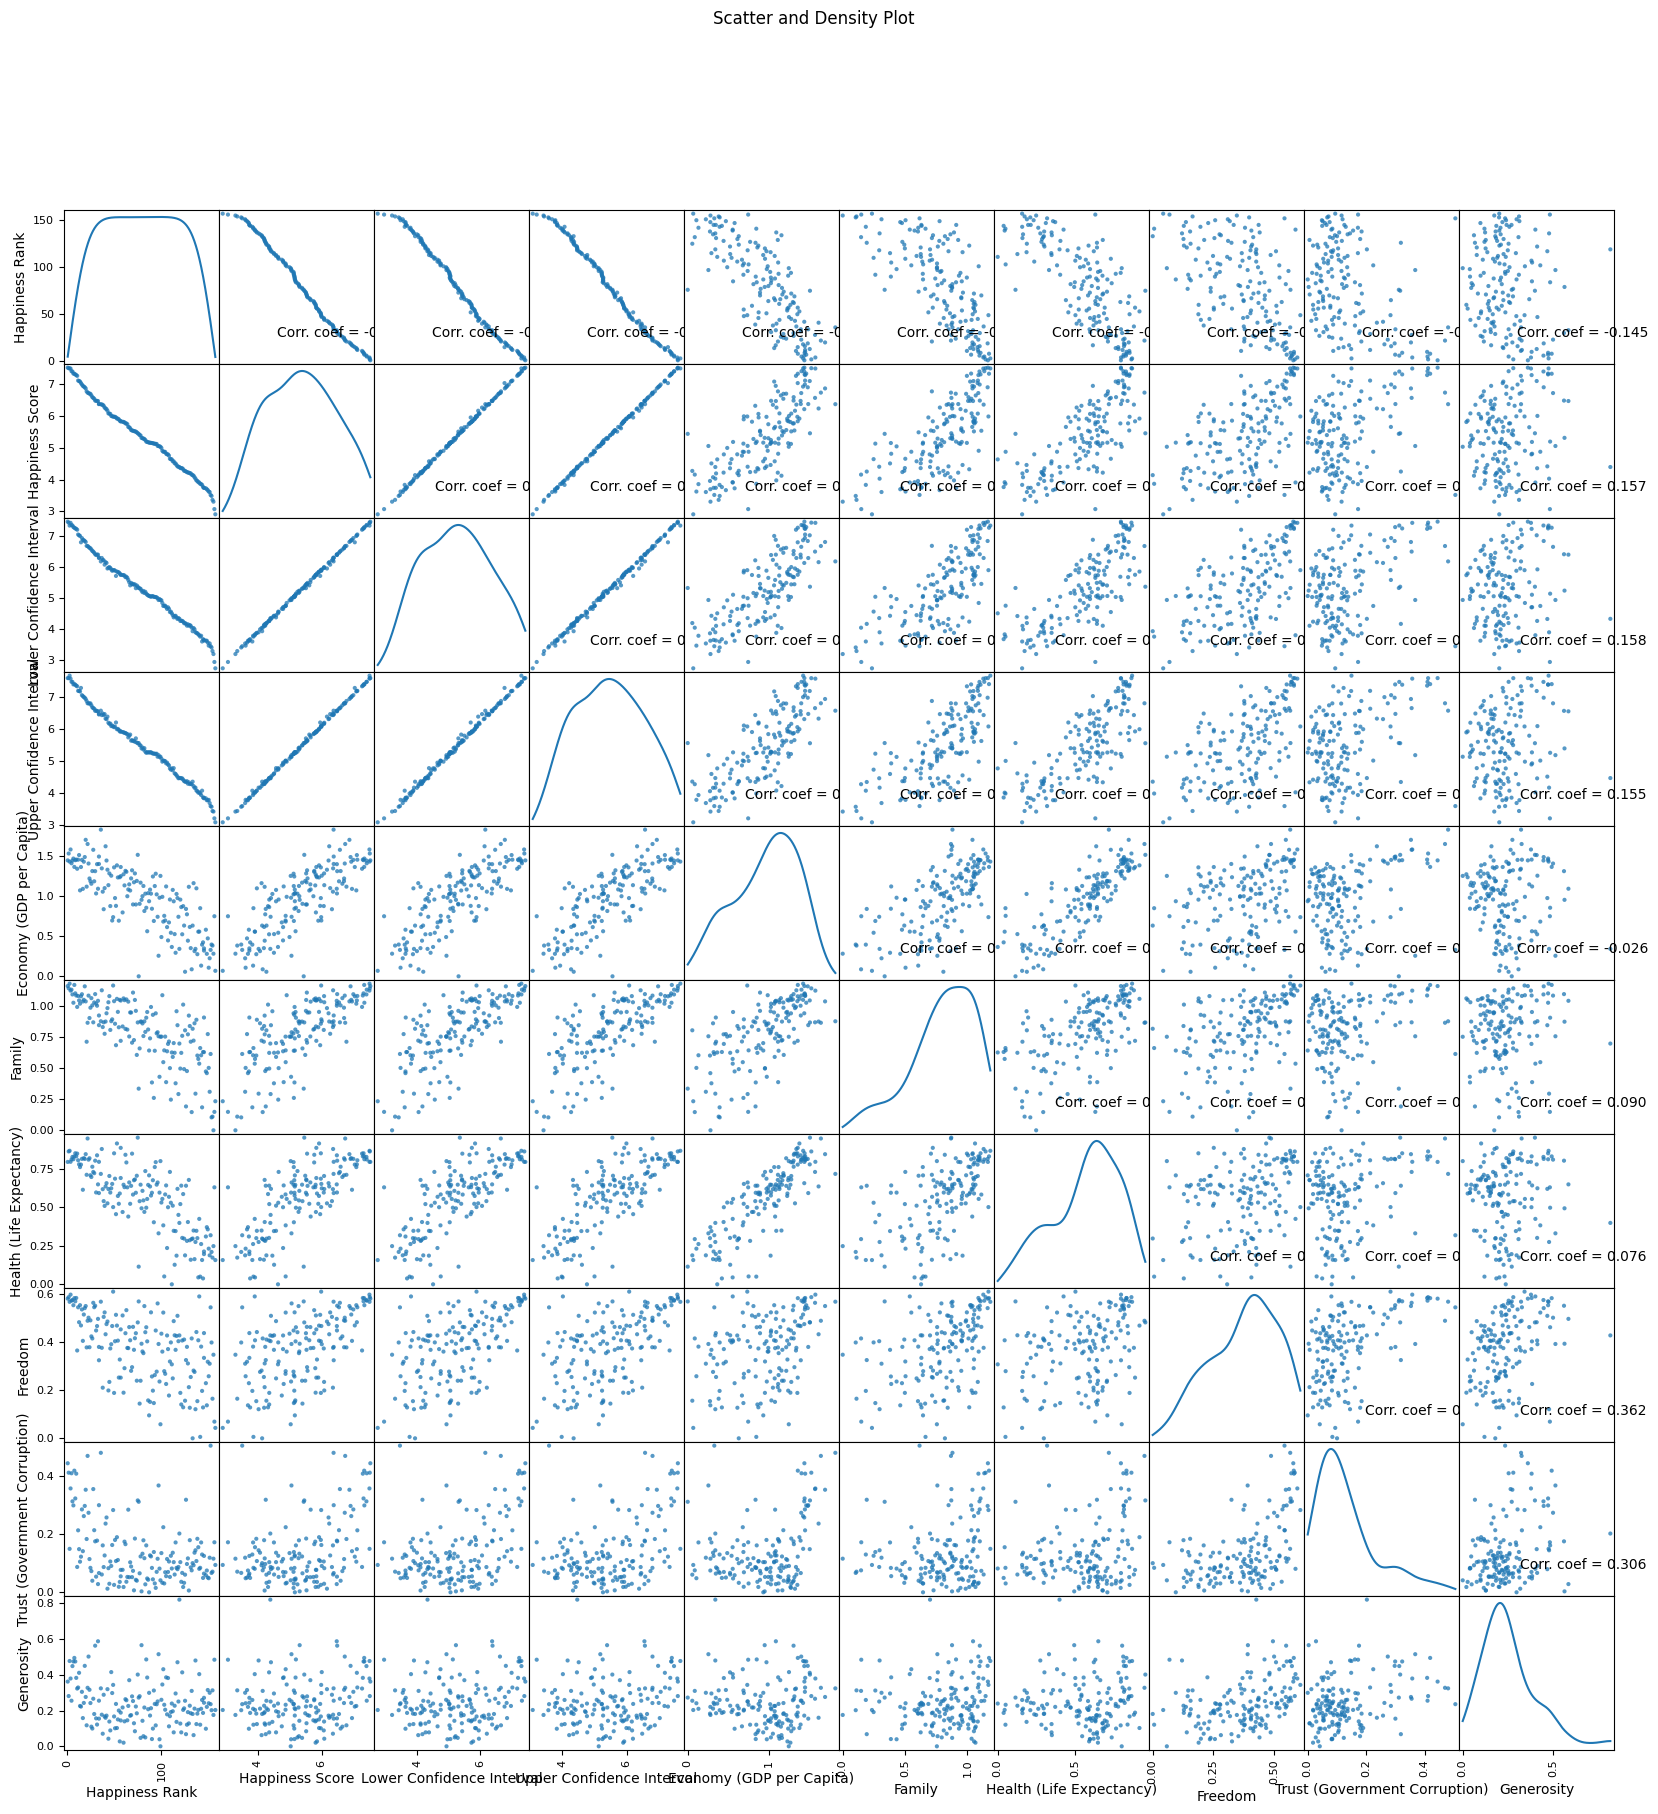

In [11]:
# Scatter and density plots:
plot_scatter_matrix(df_2016, 20, 10)


In [12]:
# Repeat the process for the third CSV file
num_rows_to_read = 1000
df_2017 = pd.read_csv('2017.csv', delimiter=',', nrows=num_rows_to_read)
df_2017.dataframe_name = '2017.csv'
num_rows, num_cols = df_2017.shape
print(f'There are {num_rows} rows and {num_cols} columns')


There are 155 rows and 12 columns


In [13]:
# Let's take a quick look at what the data looks like:
df_2017.head(5)


Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

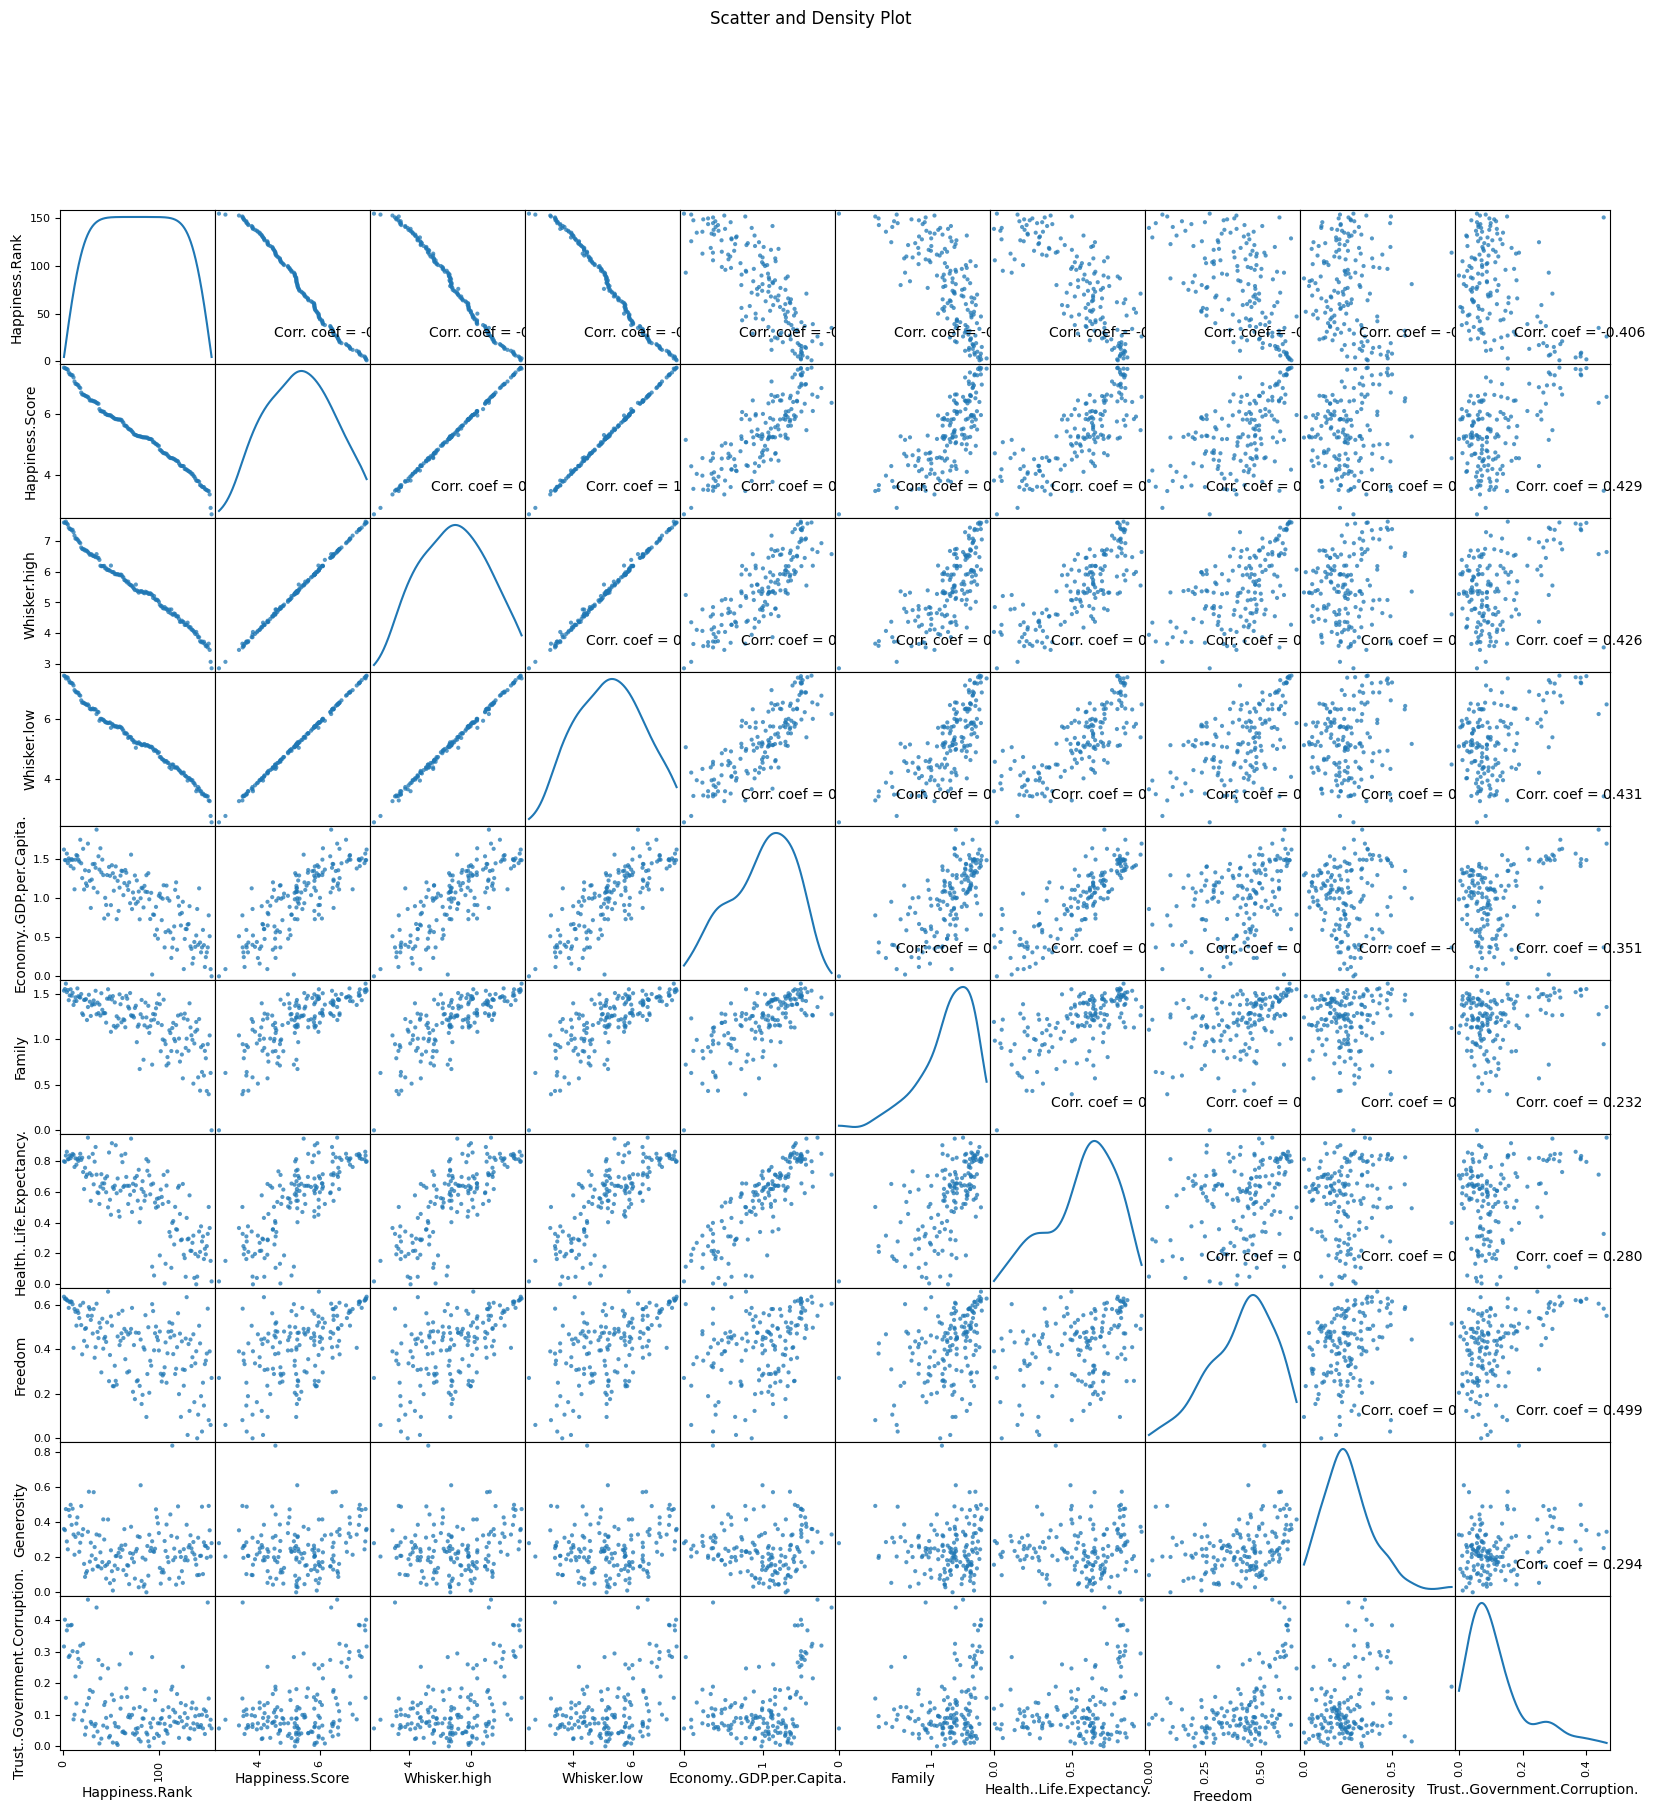

In [16]:
# Scatter and density plots:
plot_scatter_matrix(df_2017, 20, 10)
